In [1]:
import pyodc

In [2]:
pyodc.read_odb("/ec/res4/scratch/daep/ofb_redux/16045/ofb_16045_202006", single=True)

,seqno@hdr,date@hdr,time@hdr,lat@hdr,lon@hdr,statid@hdr,stalt@hdr,varno@body,vertco_reference_1@body,obsvalue@body
0,3572895,20200531,231516,22.780001,108.550003,59431,152.0,3,92500.0,4.114497
1,3572895,20200531,231516,22.780001,108.550003,59431,152.0,4,92500.0,5.663119
2,3572895,20200531,231516,22.780001,108.550003,59431,152.0,1,92500.0,7531.507324
3,3572895,20200531,231516,22.780001,108.550003,59431,152.0,2,92500.0,297.450012
4,3572895,20200531,231516,22.780001,108.550003,59431,152.0,59,92500.0,294.450012
...,...,...,...,...,...,...,...,...,...,...
3483628,11792624,20200630,173400,64.318764,-96.001663,71926,51.0,3,10000.0,10.589808
3483629,11792624,20200630,173400,64.318764,-96.001663,71926,51.0,4,10000.0,3.646363
3483630,11792624,20200630,173400,64.318764,-96.001663,71926,51.0,1,10000.0,162231.406250
3483631,11792624,20200630,173400,64.318764,-96.001663,71926,51.0,2,10000.0,222.800003


In [1]:
import climetlab as cml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ds = cml.load_source('file', 'out.grib').to_xarray()
ds1 = cml.load_source('file', 'out1.grib').to_xarray()
ds2 = cml.load_source('file', 'out2.grib').to_xarray()

In [11]:
ds.ssrd.min().values, ds1.ssrd.min().values, ds2.ssrd.min().values

(array(-1.90156555), array(0.), array(0.))

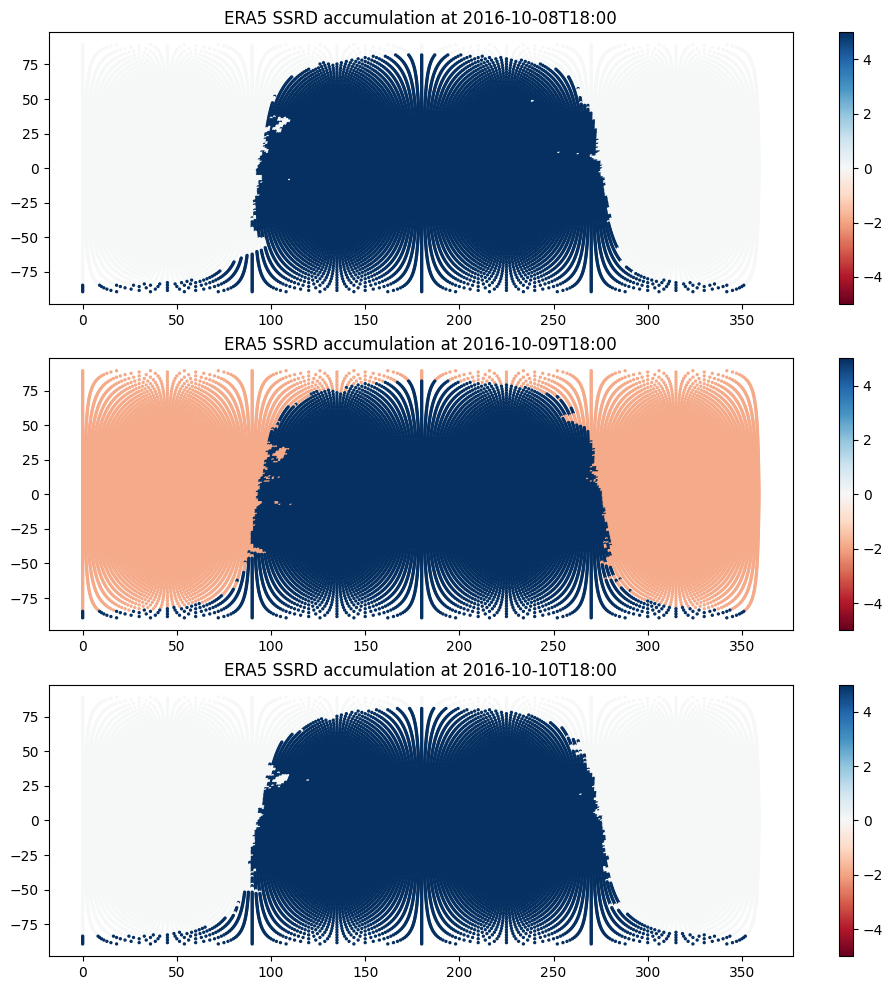

In [19]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
axes = ax.flatten()
c = axes[1].scatter(ds.longitude.values, ds.latitude.values, c=ds.ssrd.values, s=2, vmin=-5, vmax=5, cmap="RdBu")
axes[1].set_title(f"ERA5 SSRD accumulation at {str(ds.time.values)[2:18]}")
plt.colorbar(c)
c = axes[0].scatter(ds.longitude.values, ds.latitude.values, c=ds1.ssrd.values, s=2, vmin=-5, vmax=5, cmap="RdBu")
axes[0].set_title(f"ERA5 SSRD accumulation at {str(ds1.time.values)[2:18]}")
plt.colorbar(c)
c = axes[2].scatter(ds.longitude.values, ds.latitude.values, c=ds2.ssrd.values, s=2, vmin=-5, vmax=5, cmap="RdBu")
axes[2].set_title(f"ERA5 SSRD accumulation at {str(ds2.time.values)[2:18]}")
plt.colorbar(c)

In [22]:
ds = ds.to_xarray()

In [23]:
ds.ssrd.min().values

array(0.)

In [24]:
ssrd = np.clip(ds.ssrd.values, None, 0)

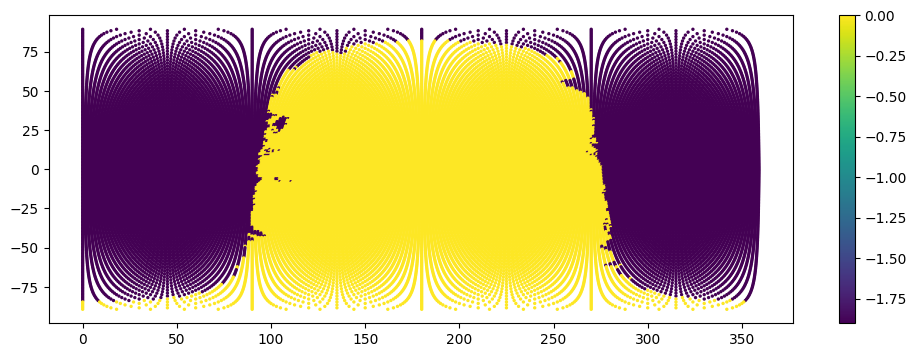

In [20]:
fig = plt.figure(figsize=(12,4))
c = plt.scatter(ds.longitude.values, ds.latitude.values, c=ssrd, s=2)
plt.colorbar(c)

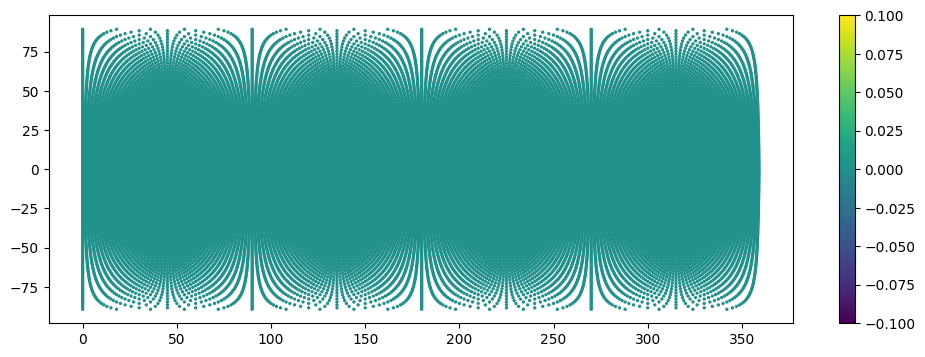

In [25]:
fig = plt.figure(figsize=(12,4))
c = plt.scatter(ds.longitude.values, ds.latitude.values, c=ssrd, s=2)
plt.colorbar(c)